In [64]:
# %load_ext blackcellmagic

In [72]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


In [58]:
def data(path):  
    df = pd.read_csv(path,sep=";")
    return df

In [165]:
df = data('../data/cardio_train.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [166]:
outdir = "../test/testoutput"

In [167]:
df = df.loc[df['gender']==1]

In [169]:
(df['height'] > 180).sum()

142

In [118]:
def eda(df,outdir):
    
    df2 = df.copy()
    df2['age'] = (df2['age'] / 365).round().astype('int')
    
    bins= [30,35,40,45,50,55,60,65]
    labels = ["30-35","35-40","40-45","45-50","50-55","55-60","60-65"]
    df2['AgeGroup'] = pd.cut(df2['age'], bins=bins, labels=labels, right=False)
    rcParams['figure.figsize'] = 11, 8
    ageGroup = plt.figure()
    sns.countplot(x='AgeGroup', hue='cardio', data = df2)
    
    ageBox = plt.figure()
    sns.boxplot(x='cardio',y='age',data=df2)
    
    cardio = df2[df2.cardio == 1]
    cardioFeature = plt.figure()
    cardio_cate = cardio.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
    sns.countplot(x="variable", hue="value",data= pd.melt(cardio_cate))
    
    noncardio = df2[df2.cardio == 0]
    noncardio_cate = noncardio.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
    noncardioFeature = plt.figure()
    sns.countplot(x="variable", hue="value",data= pd.melt(noncardio_cate))
    
    gender= plt.figure()
    sns.countplot(x='gender', hue='cardio', data = df)
    
    corr = df.corr()
    corrPlot= plt.figure()
    sns.heatmap(corr, annot=True)
    
    df2['ponderIndex'] = df2['weight']/(df2['height']/100)**3
    bins= [0,3,7,11,15,19,23,27,31,35,39,44]
    labels = ["0-3","3-7","7-11","11-15","15-19","19-23","23-27","27-31","31-35","35-39","39-44"]
    df2['PIGroup'] = pd.cut(df2['ponderIndex'], bins=bins, labels=labels, right=False)
    ponderIndex = plt.figure()
    sns.countplot(x='PIGroup', hue='cardio', data = df2)
    
    df2['ponderIndex'].describe().to_csv("../test/testoutput/ponderIndex.csv")
    
     
    line_x1 = np.linspace(50, 250, 1000)
    line_y1 = 11*((line_x1/100)**3)
    line_x2 = np.linspace(50, 250, 1000)
    line_y2 = 15*((line_x1/100)**3)
    PIScatter = plt.figure() 
    sns.scatterplot(x='height',y='weight', hue='cardio', data = df)
    plt.plot(line_x1, line_y1, color='r')
    plt.plot(line_x2, line_y2, color='r')
    
    fp1= os.path.join(outdir, 'ageGroup.png')
    ageGroup.savefig(fp1)
    
    fp2= os.path.join(outdir, 'ageBox.png')
    ageBox.savefig(fp2)
    
    fp3= os.path.join(outdir, 'cardioFeature.png')
    cardioFeature.savefig(fp3)
    
    fp4= os.path.join(outdir, 'noncardioFeature.png')
    noncardioFeature.savefig(fp4)
    
    fp5= os.path.join(outdir, 'gender.png')
    gender.savefig(fp5)
    
    fp6= os.path.join(outdir, 'ponderIndex.png')
    ponderIndex.savefig(fp6)
    
    fp7= os.path.join(outdir, 'PIScatter.png')
    PIScatter.savefig(fp7)
    
    fp8= os.path.join(outdir, 'corrPlot.png')
    corrPlot.savefig(fp8)
    
    fp9= os.path.join(outdir, 'hist.png')
    df.hist()
    plt.savefig(fp9)
    
    return

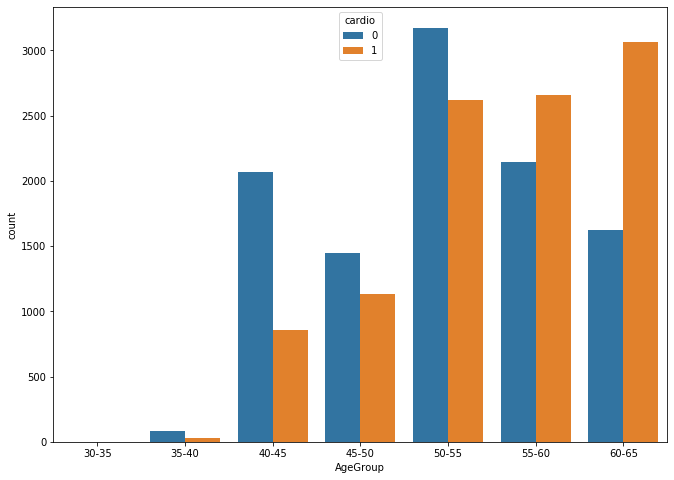

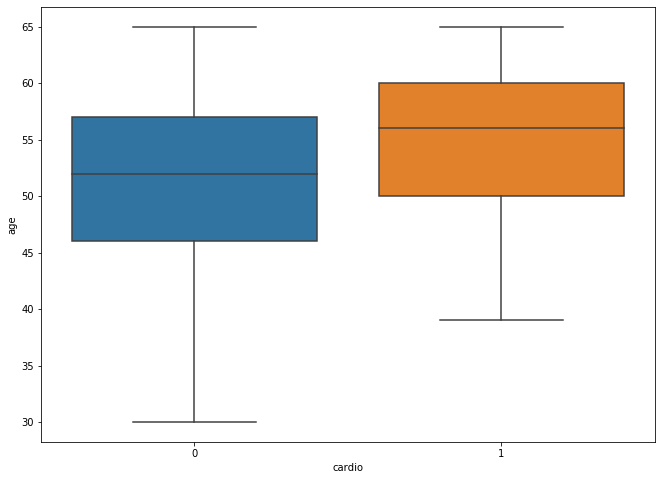

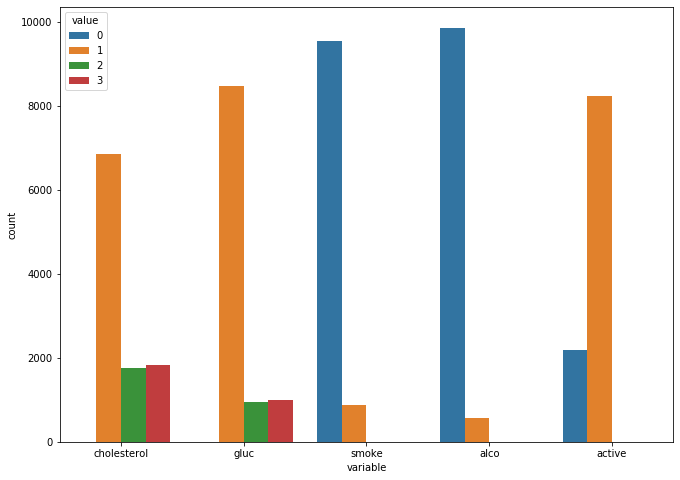

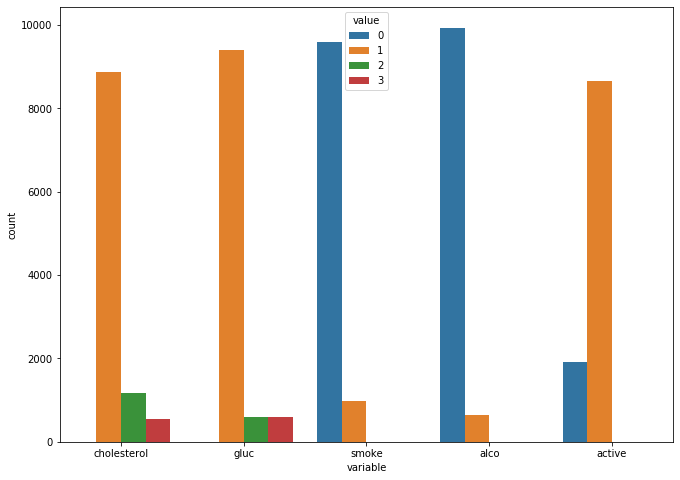

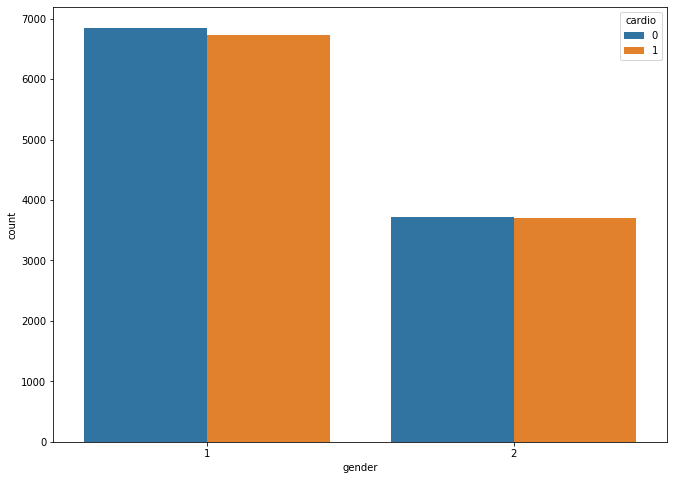

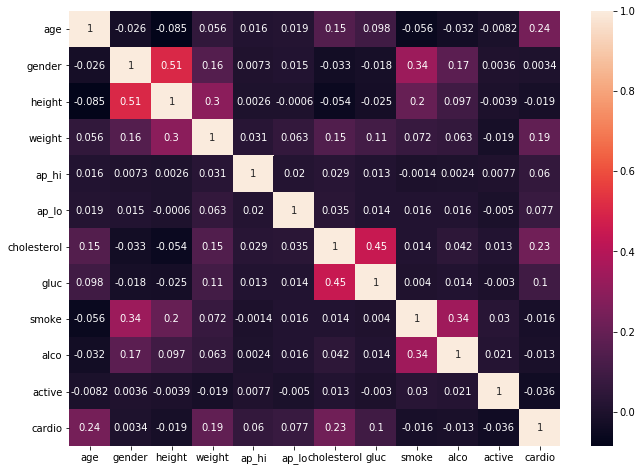

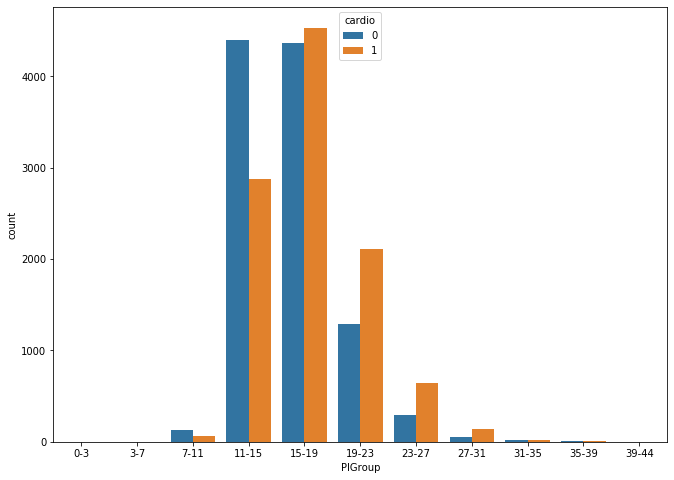

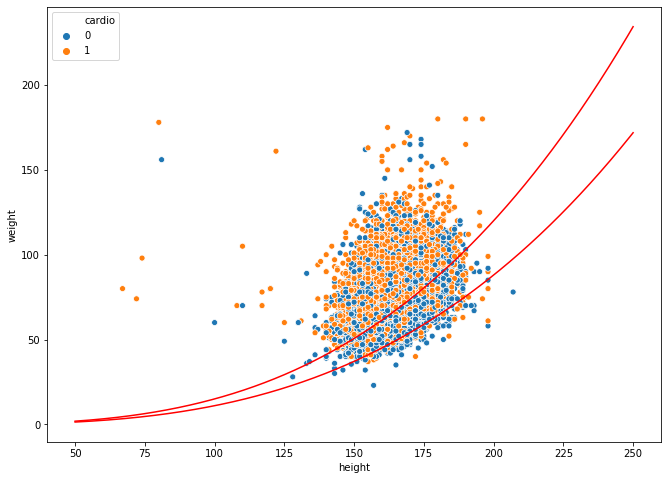

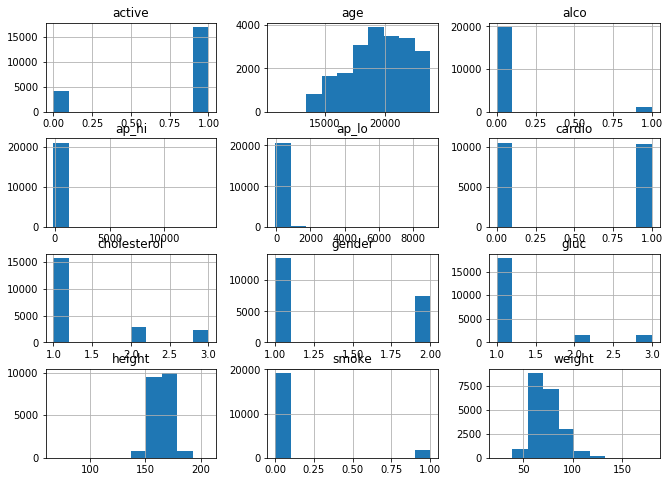

In [119]:
eda(data('../test/testdata/testData.csv'),outdir)

In [62]:
def describe(df):
    df['age'] = (df['age']/365).round().astype('int')
    df.describe().to_csv("../test/testoutput/description.csv")
    return

In [120]:
## helper function
def plot_TPR_FPR(FPR_lst, TPR_lst,outdir):
    
    fp1 = os.path.join(outdir, 'FPR_TPR.png')
    ## TPR vs. FPR
    plt.figure()
    plt.plot(FPR_lst,TPR_lst)
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.title('TPR vs. FPR',fontsize=15)
    plt.savefig(fp1)
    plt.show()
    

In [121]:
## helper function
def plot_TPR_FDR(TPR_lst, FDR_lst,outdir):
    
    fp2 = os.path.join(outdir, 'TPR_FDR.png')
    ## TPR vs. FDR
    plt.figure()
    plt.plot(FDR_lst,TPR_lst)
    plt.xlabel('False Discovery Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.title('TPR vs. FDR',fontsize=15)
    plt.savefig(fp2)
    plt.show()
   

In [122]:
## helper function
def plot_rates(threshold, FPR_lst, TPR_lst, FDR_lst,outdir):  
    
    fp3 = os.path.join(outdir, 'rates.png')
    # line 1 points
    x1 = threshold
    y1 = FPR_lst
    
    plt.figure()
    
    # plotting the line 1 points 
    plt.plot(x1, y1, label = "False Positive Rate")


    # line 2 points
    x2 = threshold
    y2 = TPR_lst
    # plotting the line 2 points 
    plt.plot(x2, y2, label = "True Positive Rate")

    # line 3 points
    x3 = threshold
    y3 = FDR_lst
    # plotting the line 2 points 
    plt.plot(x3, y3, label = "False Discovery Rate")

    plt.xlabel('Threshold')
    # Set the y axis label of the current axis.
    plt.ylabel('Rate')
    # Set a title of the current axes.
    plt.title('Rates as function of Threshold')
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.savefig(fp3)
    plt.show()
    

In [123]:
def prediction_model(path,outdir):
    
    #df = pd.read_csv(path, sep=';')
    df = path
    X = df.drop(['cardio'], axis=1)
    y = df['cardio']

    
    FPR_lst = []
    TPR_lst = []
    FDR_lst = []
    scores = []
    threshold = np.arange(0.1,0.9,0.01)

    clf = LogisticRegression(class_weight="balanced")
    clf.fit(X, y)

    for i in threshold:

        preds = pd.Series(clf.predict_proba(X)[:,1])
        preds[preds >= i] = 1
        preds[preds < i] = 0

        TP_ = np.logical_and(preds, y)
        FP_ = np.logical_and(preds, np.logical_not(y))
        TN_ = np.logical_and(np.logical_not(preds), np.logical_not(y))
        FN_ = np.logical_and(np.logical_not(preds), y)

        TP = sum(TP_)
        FP = sum(FP_)
        TN = sum(TN_)
        FN = sum(FN_)

        FPR = FP/(FP+TN)
        FPR_lst.append(FPR)

        TPR = TP/(TP+FN)
        TPR_lst.append(TPR)

        FDR = FP/(FP+TP)
        FDR_lst.append(FDR)

        scores.append(accuracy_score(preds, y))
        
    plot_rates(threshold, FPR_lst, TPR_lst, FDR_lst,outdir)
    plot_TPR_FPR(FPR_lst, TPR_lst,outdir)
    plot_TPR_FDR(TPR_lst, FDR_lst,outdir)
    return pd.DataFrame(data={'threshold':threshold,'TPR':TPR_lst,'FPR':FPR_lst,'FDR':FDR_lst})

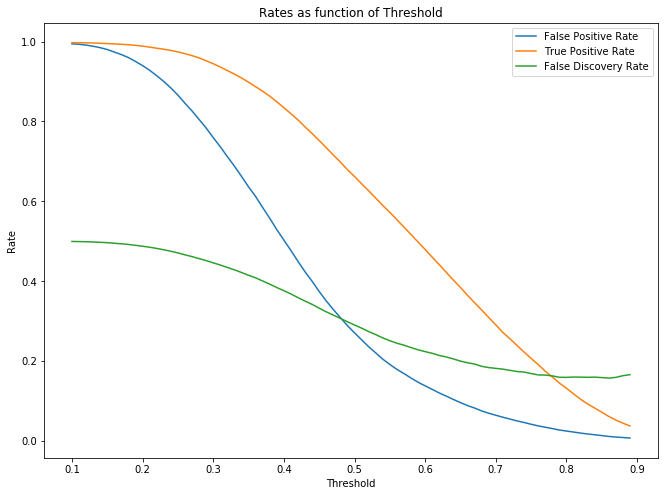

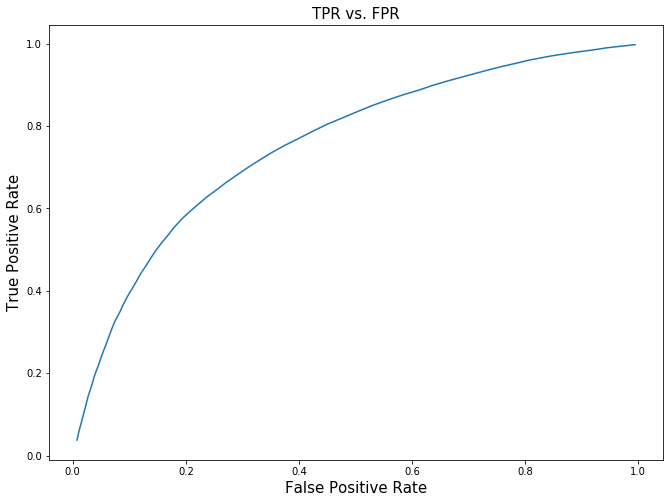

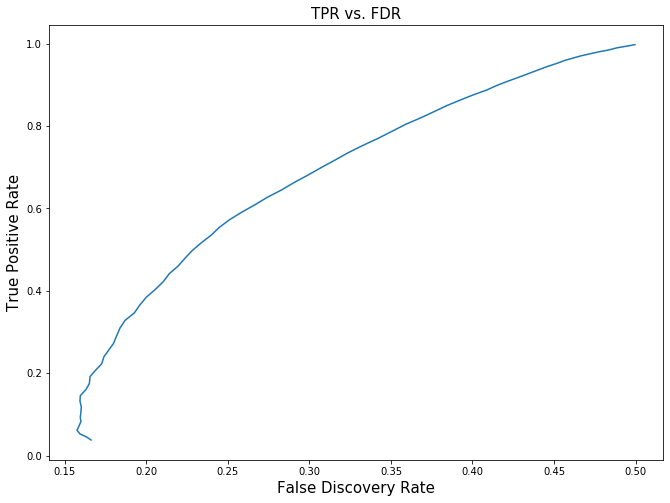

,threshold,TPR,FPR,FDR
0,0.10,0.997227,0.994460,0.499606
1,0.11,0.997084,0.993147,0.499311
2,0.12,0.996827,0.991177,0.498879
3,0.13,0.996512,0.988350,0.498244
4,0.14,0.995712,0.984666,0.497511
...,...,...,...,...
75,0.85,0.072215,0.013620,0.158841
76,0.86,0.061465,0.011479,0.157524
77,0.87,0.052489,0.009937,0.159341
78,0.88,0.044741,0.008738,0.163549


In [125]:
prediction_model(data('../data/cardio_train.csv'),outdir)